# What are the MNIST datasets?

The MNIST dataset is a popular dataset of handwritten digits commonly used for training and testing machine learning models in the field of computer vision. 

It consists of a training set of 60,000 images and a test set of 10,000 images, each of which is a grayscale image of size 28x28 pixels. 

The images are labeled with the corresponding digit they represent, ranging from 0 to 9. 


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist as mnist_k
from sklearn.datasets import fetch_openml

# Load Data

The **load_digits** dataset from scikit-learn is a toy dataset consisting of 8x8 pixel images of digits 0 to 5, with each digit having 180 samples. 
This dataset is smaller in size than the MNIST dataset loaded by fetch_openml('mnist_784'), which has 70,000 images of 28x28 pixels of digits 0 to 9.

In [2]:
# LOADING MNIST from KERAS
mnist_keras = mnist_k.load_data()

print('\nKERAS mnist datatype: {}'.format(type(mnist_keras)))
print('KERAS mnist number of elements: {}'.format(len(mnist_keras)))

11490434/11490434 [==============================] - 0s 0us/step
KERAS mnist datatype: <class 'tuple'>
KERAS mnist number of elements: 2


In [24]:
# LOADING MNIST from SKLEARN
mnist_skl = fetch_openml('mnist_784', version=1, return_X_y = True)

# version=1
# return_X_y=True

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Data Type

The MNIST datasetS are packaged and loaded in different ways in Keras and Scikit-learn.

* **Keras**: the MNIST dataset is loaded as a set of four NumPy arrays: train images, train labels, test images, and test labels. The images are 28x28 grayscale images, and the labels are integer values representing the digit in the image.
* **Scikit-learn**: the MNIST dataset is loaded as a single 2D array of shape (n_samples, n_features), where n_samples is the number of images and n_features is the number of pixels in each image. The pixel values are flattened into a single row and scaled to the range [0, 1]. The labels are provided as a separate 1D array of length n_samples.

In [40]:
# checking data types

print('SKLEARN mnist datatype: ', type(mnist_skl))
print('SKLEARN mnist lenght: ', len(mnist_skl))

# A Bunch object is essentially a dictionary that can be accessed using attribute notation

print('\nKERAS mnist datatype: ', type(mnist_keras))
print('KERAS mnist lenght: ', len(mnist_keras))

SKLEARN mnist datatype:  <class 'tuple'>
SKLEARN mnist lenght:  2

KERAS mnist datatype:  <class 'tuple'>
KERAS mnist lenght:  2


[2, 2]

# Splitting Data

The input data is typically denoted as **X**, while the target variable that we want to predict is denoted as **y**. 

So, the **X** will have the images and the **y** the labels.

In the MNIST datasets the first 60.000 that are designed for training and the last 10.000 for test.

In [47]:
# KERAS: Splitting data into sets for training and testing

# X representents the images samples and y represents the labels
(X_train_k, y_train_k), (X_test_k, y_test_k) = mnist_keras

print('X_train_k type: ', type(X_train_k))
print('y_train_k type: ', type(y_train_k))

print('\nKeras Training Data: {}'.format(X_train_k.shape))
print('Keras Training Labels: {}'.format(y_train_k.shape))
print('Keras Testing Data: {}'.format(X_test_k.shape))
print('Keras Testing Labels: {}'.format(y_test_k.shape))

X_train_k type:  <class 'numpy.ndarray'>
y_train_k type:  <class 'numpy.ndarray'>

Keras Training Data: (60000, 28, 28)
Keras Training Labels: (60000,)
Keras Testing Data: (10000, 28, 28)
Keras Testing Labels: (10000,)


In [68]:
# SKLEARN: splitting data and labels

X_skl, y_skl = mnist_skl

print('mnist_skl type: ', type(mnist_skl))
print('\nX_skl type: ', type(X_skl))
print('X_skl shape: ', X_skl.shape)
print('\ny_skl type: ', type(y_skl))
print('y_skl shape: ', y_skl.shape)

# splitting data into train and test
X_train_skl, X_test_skl, y_train_skl, y_test_skl = X_skl[:60000], X_skl[60000:], y_skl[:60000], y_skl[60000:]

print('\nSklearn Training Data: {}'.format(X_train_skl.shape))
print('Sklearn Training Labels: {}'.format(y_train_skl.shape))
print('Sklearn Testing Data: {}'.format(X_test_skl.shape))
print('Sklearn Testing Labels: {}'.format(y_test_skl.shape))

mnist_skl type:  <class 'tuple'>

X_skl type:  <class 'pandas.core.frame.DataFrame'>
X_skl shape:  (70000, 784)

y_skl type:  <class 'pandas.core.series.Series'>
y_skl shape:  (70000,)

Sklearn Training Data: (60000, 784)
Sklearn Training Labels: (60000,)
Sklearn Testing Data: (10000, 784)
Sklearn Testing Labels: (10000,)


# Viewing Images and Labels

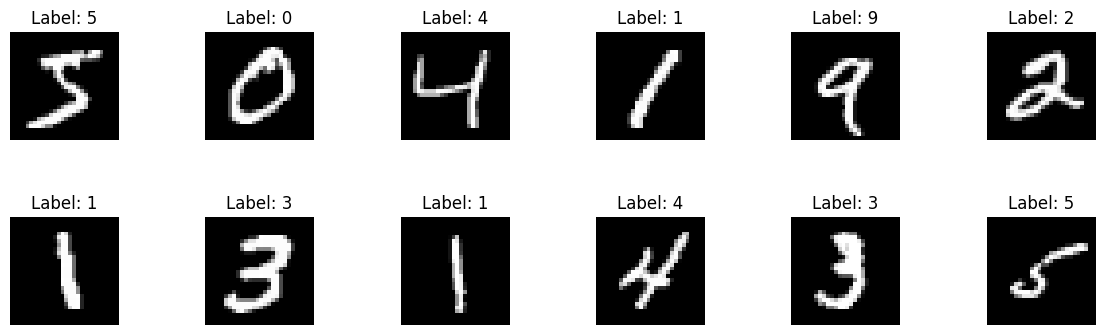

In [7]:
# from KERAS
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(14, 4))
fig.subplots_adjust(hspace = 0.5, wspace=0.8)
for i, ax in enumerate(axs.flatten()):
    if i < 12:
        ax.imshow(X_train_k[i], cmap='gray')
        ax.set_title(f"Label: {y_train_k[i]}") # set the label as a title for each image
        ax.axis('off') # turn of the axis
plt.show()

# the .flatten() is used to convert a multi-dimensional array into a one-dimensional array.
# cmap='gray' argument specifies that the images should be displayed in grayscale.

In [66]:
print(X_train_skl.shape)
print(type(X_train_skl))

(60000, 784)
<class 'pandas.core.frame.DataFrame'>


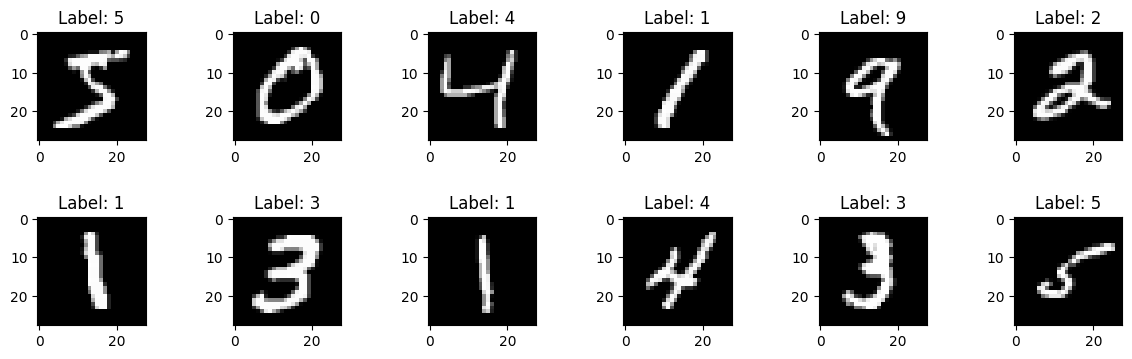

In [73]:
# from SKLEARN

# to be able to reshape it to the format that can be seen (28 x 28) it is necessary to convert the pandas dataframe to a numpy array
# The 784 values present in each line are transformed into a 28 x 28 matrix
X_train_skl_array = np.array(X_train_skl)  # convert to numpy array
X_train_skl_reshaped = X_train_skl_array.reshape(-1, 28, 28)  # reshape to (70000, 28, 28)

fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(14, 4))
fig.subplots_adjust(hspace = 0.5, wspace=0.8)
for i, ax in enumerate(axs.flatten()):
    if i < 12:
      image = X_train_skl_reshaped[i]
      ax.imshow(image, cmap='gray')
      ax.set_title(f"Label: {y_skl[i]}")
plt.show()


# Exploring the MNIST

In [8]:
# concatenate the arrays with the labels

# from KERAS
labels_k = np.concatenate([y_train_k, y_test_k])
print('Keras Labels: {}'.format(labels_k.shape))
print('Keras labels data type: ', type(labels_k))

# from SKLEARN
labels_skl = np.concatenate([y_train_skl, y_test_skl])
print('Sklearn Labels: {}'.format(labels_skl.shape))
print('Sklearn labels data type: ', type(labels_skl))

Keras Labels: (70000,)
Keras labels data type:  <class 'numpy.ndarray'>
Sklearn Labels: (70000,)
Sklearn labels data type:  <class 'numpy.ndarray'>


In [9]:
# convert numpy array to pandas series

# from KERAS
labels_sr_k = pd.Series(labels_k)
labels_train_k = pd.Series(y_train_k)
labels_test_k = pd.Series(y_test_k)
print('Keras labels data type: ', type(labels_sr_k))

# from SKLEARN
labels_sr_skl = pd.Series(labels_skl)
labels_train_skl = pd.Series(y_train_skl)
labels_test_skl = pd.Series(y_test_skl)
print('Sklearn labels data type: ', type(labels_sr_skl))

Keras labels data type:  <class 'pandas.core.series.Series'>
Sklearn labels data type:  <class 'pandas.core.series.Series'>


In [10]:
# OCCURRENCES of each value present in the MNIST datasets
labels_values_k = labels_sr_k.value_counts()
labels_values_skl = labels_sr_skl.value_counts()

print('Keras / Sklearn')
for (a, b, c, d) in zip(labels_values_k.index.tolist(), labels_values_k, labels_values_skl.index.tolist(), labels_values_skl):
  print(a, b, '/', c, d)


Keras / Sklearn
1 7877 / 1 7877
7 7293 / 7 7293
3 7141 / 3 7141
2 6990 / 2 6990
9 6958 / 9 6958
0 6903 / 0 6903
6 6876 / 6 6876
8 6825 / 8 6825
4 6824 / 4 6824
5 6313 / 5 6313

labels_order:  ['1', '7', '3', '2', '9', '0', '6', '8', '4', '5']


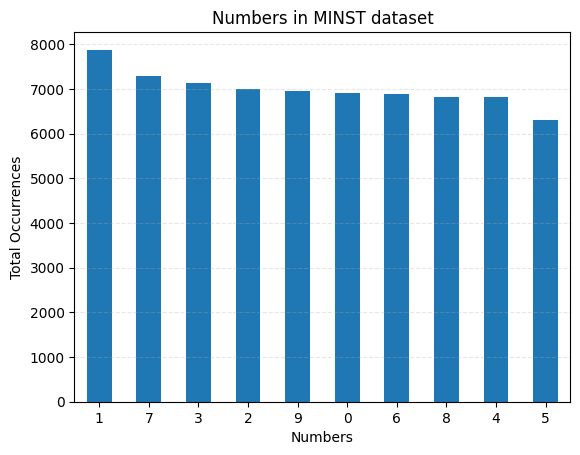

In [18]:
# occurrences of each value present in the KERAS dataset
labels_values_k = labels_sr_k.value_counts()

ax = labels_values_k.plot.bar(rot=0, alpha=1)
plt.title("Numbers in MINST dataset")
plt.xlabel("Numbers")
plt.ylabel("Total Occurrences")
plt.grid(axis = 'y', linestyle='--', alpha=0.3)

In [13]:
print(labels_train_k.value_counts().sort_index())
labels_train_vls = labels_train_k.value_counts().sort_index()
labels_test_vls = labels_test_k.value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64


In [14]:
total_labels = len(labels_sr_k)

# proportion of each value of the total (total occurrence * 100 /TOTAL)
prop_train = []
for item in labels_train_vls:
  prop = (item * 100) / len(y_train_k)
  prop_train.append(prop)

prop_train_sr = pd.Series(prop_train)

prop_test = []
for item in labels_test_vls:
  prop = (item * 100) / len(y_test_k)
  prop_test.append(prop)

prop_test_sr = pd.Series(prop_test)

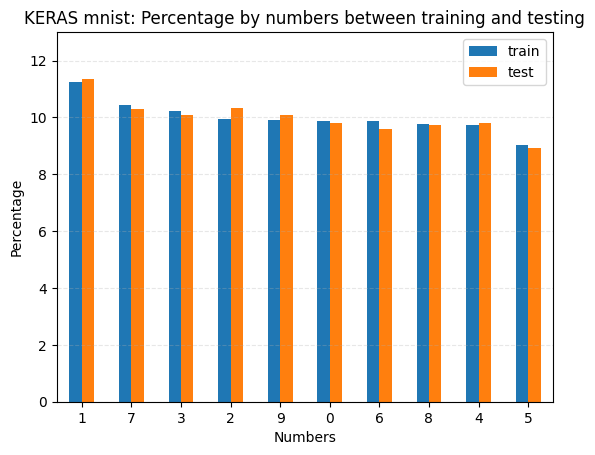

In [15]:
# Building a dataframe with the two Series and organizing the values according to frequency in descending order
df = pd.DataFrame({
    'train': prop_train_sr,
    'test': prop_test_sr
}).sort_values(by=['train'], ascending=False)

ax = df.plot.bar(rot=0, alpha=1)

plt.ylim([0, 13])
plt.title("KERAS mnist: Percentage by numbers between training and testing")
plt.xlabel("Numbers")
plt.ylabel("Percentage")
plt.grid(axis = 'y', linestyle='--', alpha=0.3)